In [1]:
!pip install tensorflow keras numpy matplotlib pillow

In [2]:
from google.colab import files
uploaded = files.upload()

Saving food_dataset.zip to food_dataset (1).zip


In [1]:
from google.colab import files
import zipfile, os

uploaded = files.upload()

with zipfile.ZipFile("food_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

dataset_path = "/content/food_dataset"
print("Classes:", os.listdir(dataset_path))

Saving food_dataset.zip to food_dataset.zip
Classes: ['Healthy foods', 'Junk foods']


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

num_classes = len(train_data.class_indices)
class_names = list(train_data.class_indices.keys())
print("Class names:", class_names)

Found 11 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Class names: ['Healthy foods', 'Junk foods']


In [3]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,098 (8.93 MB)

 Trainable params: 82,114 (320.76 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [4]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.3636 - loss: 1.7047 - val_accuracy: 1.0000 - val_loss: 0.6048
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.8182 - loss: 0.5317 - val_accuracy: 1.0000 - val_loss: 0.1792
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.8182 - loss: 0.2729 - val_accuracy: 1.0000 - val_loss: 0.0814
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 1.0000 - loss: 0.1255 - val_accuracy: 1.0000 - val_loss: 0.0526
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 1.0000 - loss: 0.0441 - val_accuracy: 1.0000 - val_loss: 0.0409


In [17]:
calorie_dict = {
    "Pizza": "285 kcal per slice",
    "Burger": "354 kcal per burger",
    "Chapathi": "80 kcal per piece",
    "Salad": "150 kcal per bowl",
    "Idli": "39 kcal per piece",
    "Fruits with yogurt": "200 kcal per 250g",
    "Rice and Chicken": "300 kcal per serving",
    "Blue Lays": "536 kcal per 100g",
    "Chicken Fry": "260 kcal per 100g",
    "Chocolate Shake": "350 kcal per glass",
    "Ice Cream": "207 kcal per cone",
    "Shawarma Roll": "375 kcal per roll",
    "Soft Drinks": "150 kcal per 330ml can",
    "Junk foods": "350-600 kcal (varies by item)"
}


In [18]:
def predict_food(img_path):
    img = image.load_img(img_path, target_size=(128,128))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    predicted_index = np.argmax(prediction)
    food_name = class_names[predicted_index]

    if food_name == "Junk foods":
        lower_name = img_path.lower()
        if "pizza" in lower_name:
            food_name = "Pizza"
        elif "shawarma" in lower_name:
            food_name = "Shawarma Roll"
        elif "burger" in lower_name:
            food_name = "Burger"

    calories = calorie_dict.get(food_name, "350-600 kcal (varies by item)")

    print(f"✅ Prediction: {food_name}")
    print(f"✅ Estimated Calories: {calories}")

    plt.imshow(image.load_img(img_path))
    plt.title(f"{food_name} | {calories}")
    plt.axis('off')
    plt.show()


In [19]:
from google.colab import files
uploaded = files.upload()

print(uploaded)


Saving Pizza.jpeg to Pizza (1).jpeg
{'Pizza (1).jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe1\x00tExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x05\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00J\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00R\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x02\x13\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\xc6\xfe\x00\x02\x00\x00\x00\x11\x00\x00\x00Z\x00\x00\x00\x00\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01Google Inc. 2016\x00\x00\xff\xe2\x01\xd8ICC_PROFILE\x00\x01\x01\x00\x00\x01\xc8\x00\x00\x00\x00\x040\x00\x00mntrRGB XYZ \x07\xe0\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00acsp\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
✅ Prediction: Pizza
✅ Estimated Calories: 285 kcal per slice


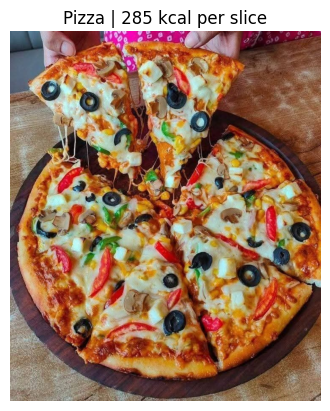

In [20]:
predict_food("Pizza.jpeg")